In [1]:
import pandas as pd
from age_balance_analysis import channels
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


sns.set_style("darkgrid")

LABELLING_DATA_PATH = "../data/filtered_261023_kirill_bugFL.csv"


In [2]:
labelled_df = pd.read_csv(LABELLING_DATA_PATH)
labelled_df = labelled_df.rename(columns={"Gene": "gene", "Timepoint": "time", "HeavyFraction": "labelling", "Category": "category"})
labelled_df = labelled_df.dropna()
s_over_n_threshold = labelled_df.Log10SignalToNoise_heavy_sum.median() * 2
labelled_df = labelled_df[labelled_df.Log10SignalToNoise_heavy_sum > s_over_n_threshold]

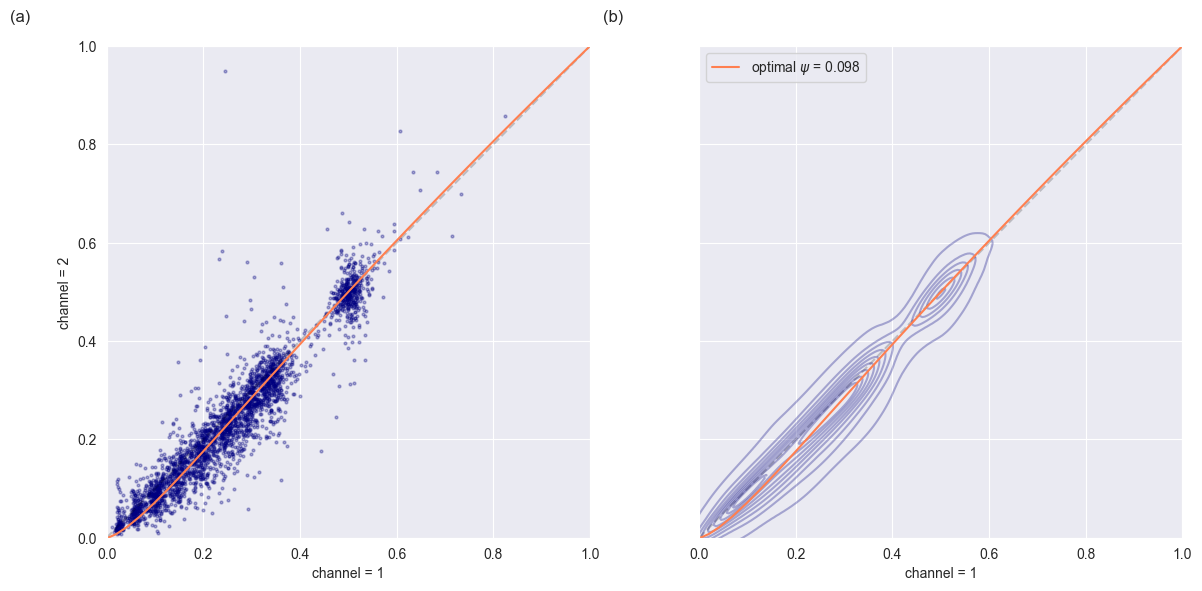

In [3]:
adjusted_df = labelled_df.pivot(index=["PG.ProteinAccessions", "time"], columns="channel", values="labelling").reset_index()
c1_values = adjusted_df[1].values
c2_values = adjusted_df[2].values
FREE_AA_PSI, fig1 = channels.find_best_fitting_psi(c1_values, c2_values, skip_plotting=False)

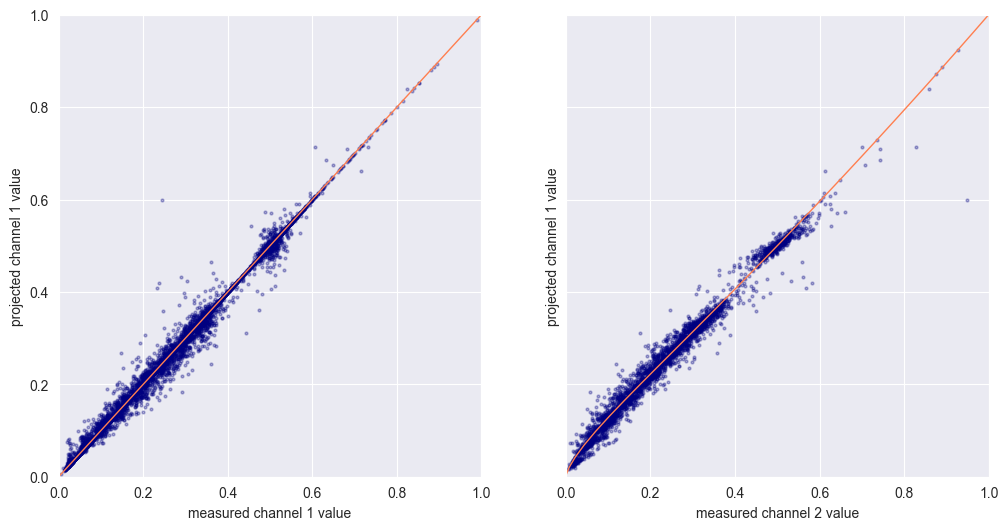

In [6]:
adjusted_c1_values, fig2 = channels.project_on_channel_one(c1_values, c2_values, FREE_AA_PSI, skip_plotting=False)
adjusted_df["adjusted_channel_1"] = adjusted_c1_values